In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=np.RankWarning)

In [18]:
path = '/home/corn/Documents/ScienceFair/Data/Data_1/Tri/t3.xlsx' # 路徑
area = 200

df = pd.read_excel(path)
data = df.iloc[:, 4:].values
data = data[data[:, 1] != 0]

top_index = np.argmax(data[:, 0])

strees, strain = data[:top_index, 0], data[:top_index, 1]

test_range = [(i, i + area) for i in range(top_index - area)]
slope = [np.polyfit(strain[i:j], strees[i:j], 1)[0] for i, j in test_range]

print(f"Max Slope : {max(slope)}")

Max Slope : 0.9049192451500149


Draw Strees & Strain and Max Slope

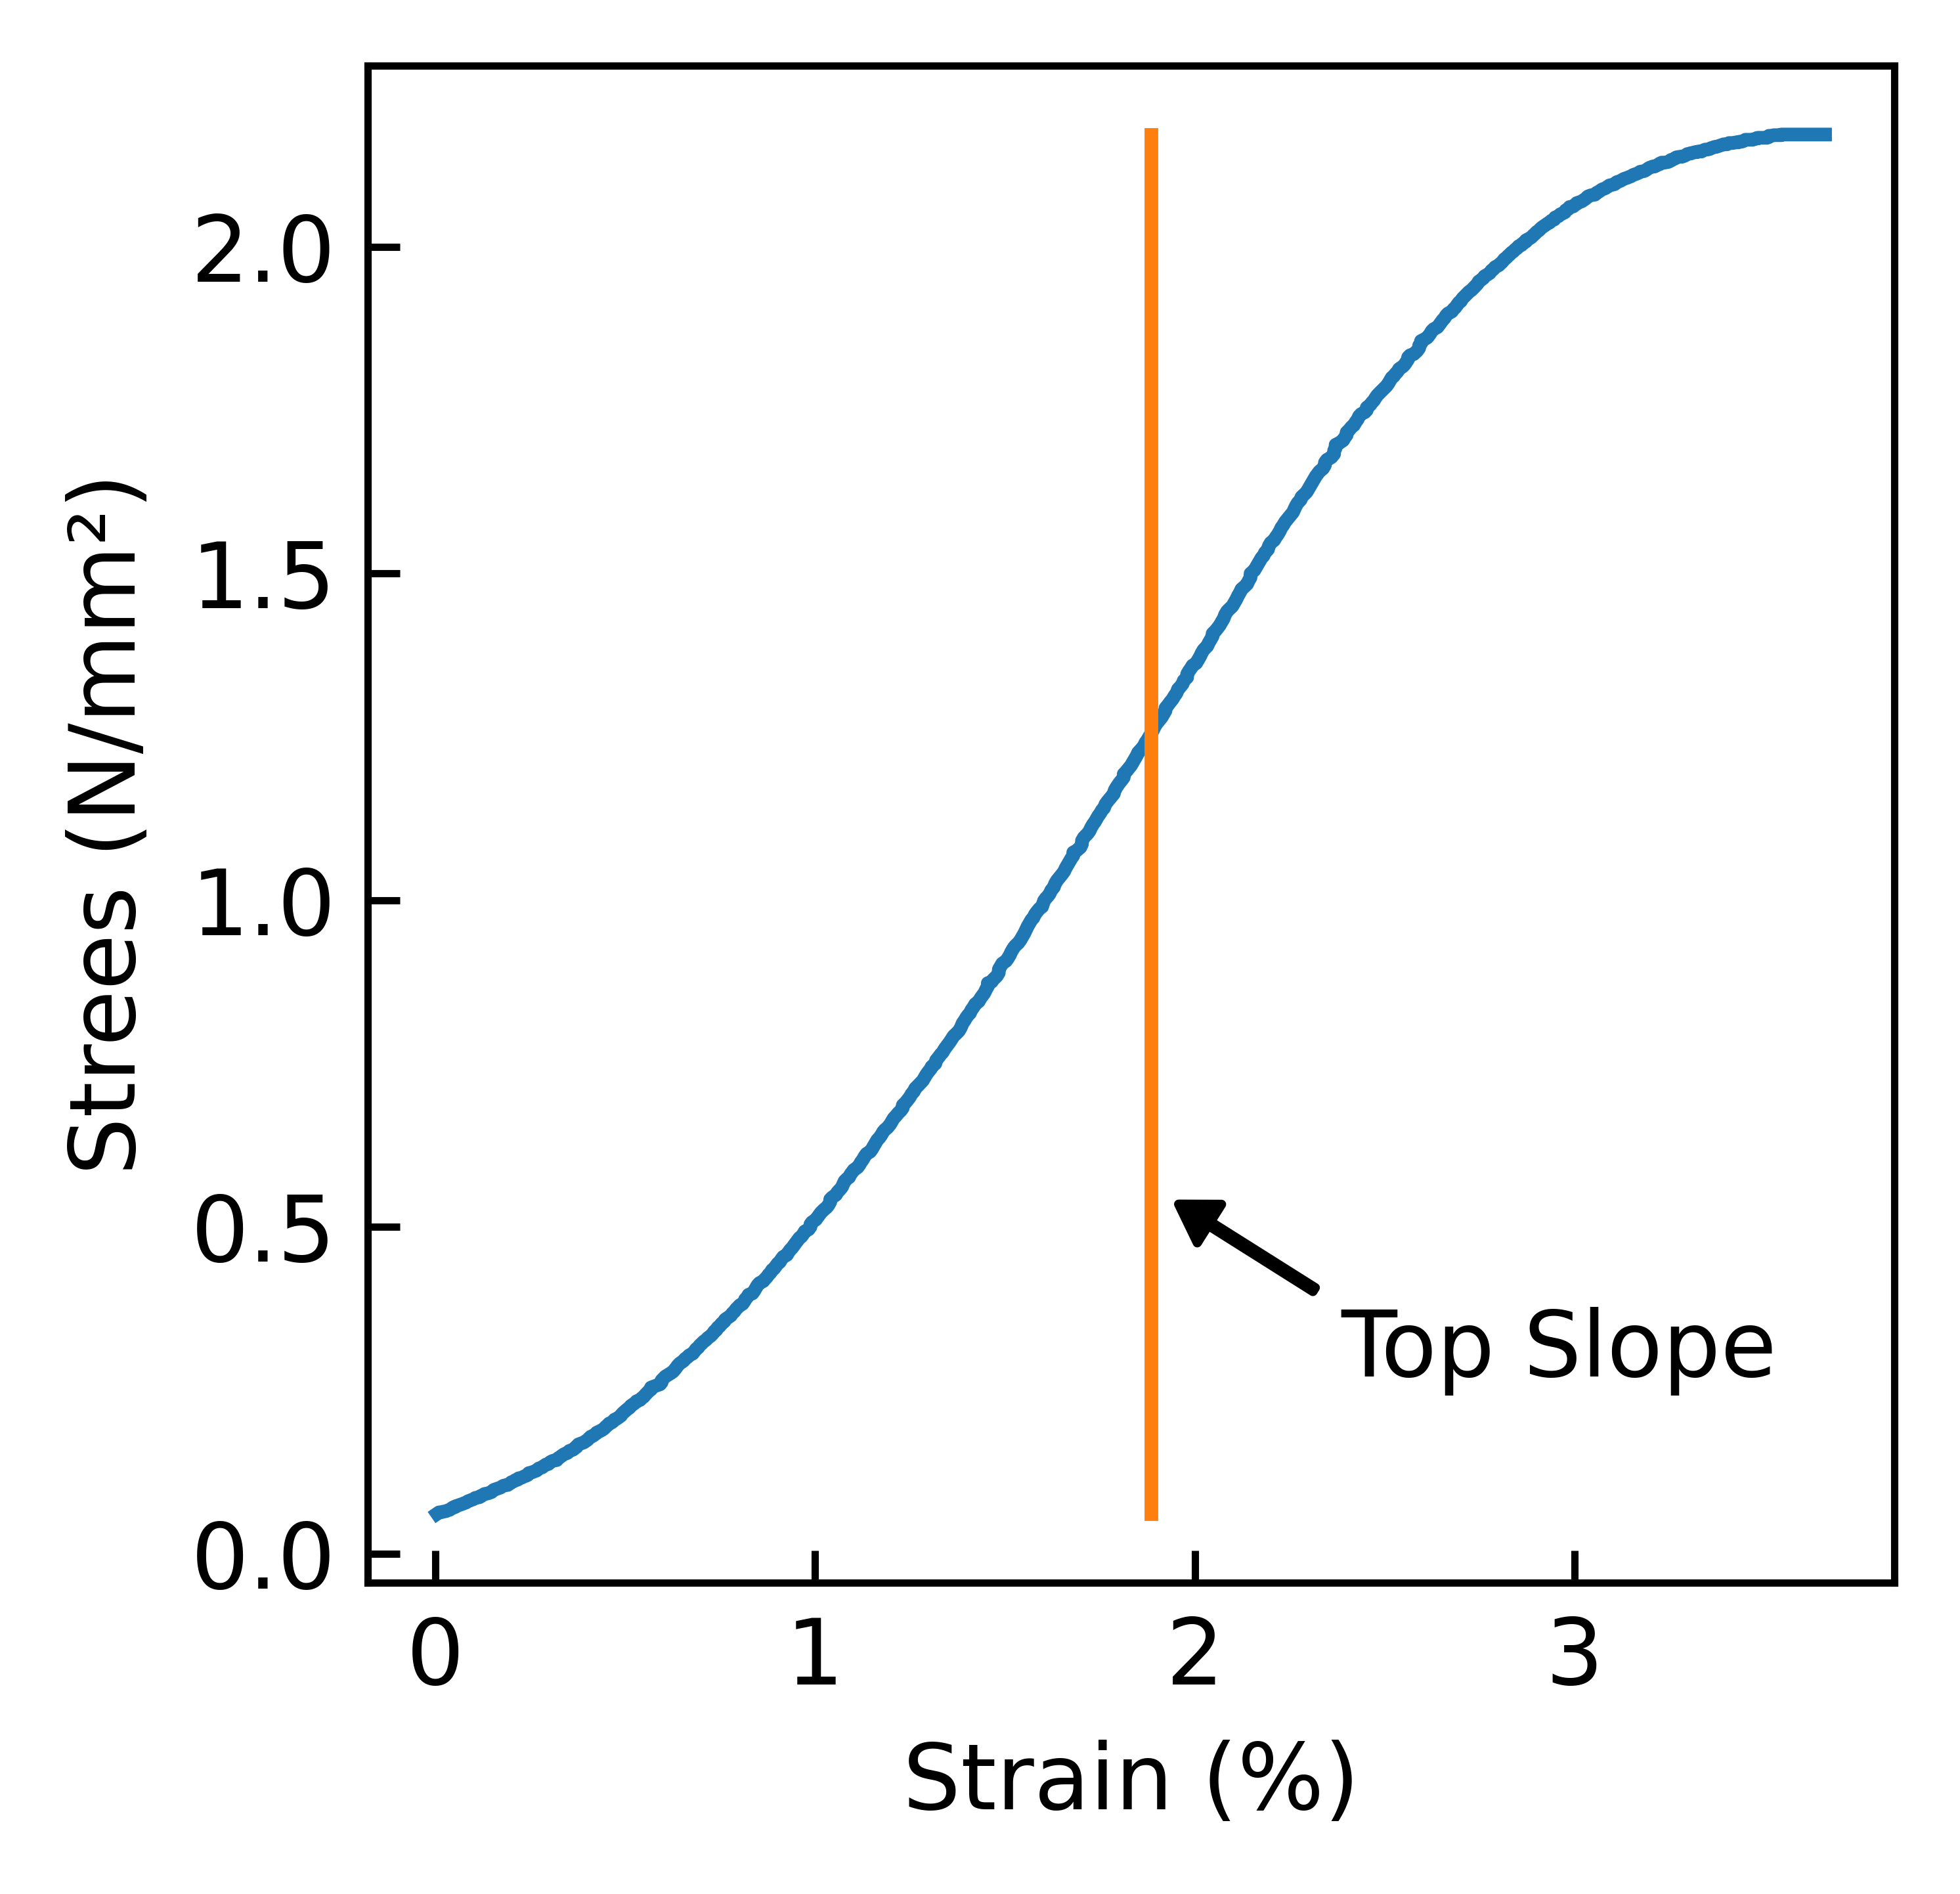

In [16]:
max_slope_index = np.argmax(slope) + int(area/2)

plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(3, 3), dpi=1000)
plt.xlabel("Strain (%)")
plt.ylabel("Strees (N/mm\u00b2)")
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

plt.plot(strain, strees)

x = (strain[max_slope_index],) * 2
y = (min(strees), max(strees))
plt.plot(x, y)

plt.annotate(
    "Top Slope",
    xy=(strain[max_slope_index] + 0.05, max(strees)/4),
    xytext=(strain[max_slope_index] + 0.5, max(strees)/8),
    arrowprops={
        'width':0.5,
        'headlength':4,
        'headwidth':5,
        'facecolor':'#000',
        'shrink':0.05
    },
    fontsize=10
)

plt.show()

Tatal Slope

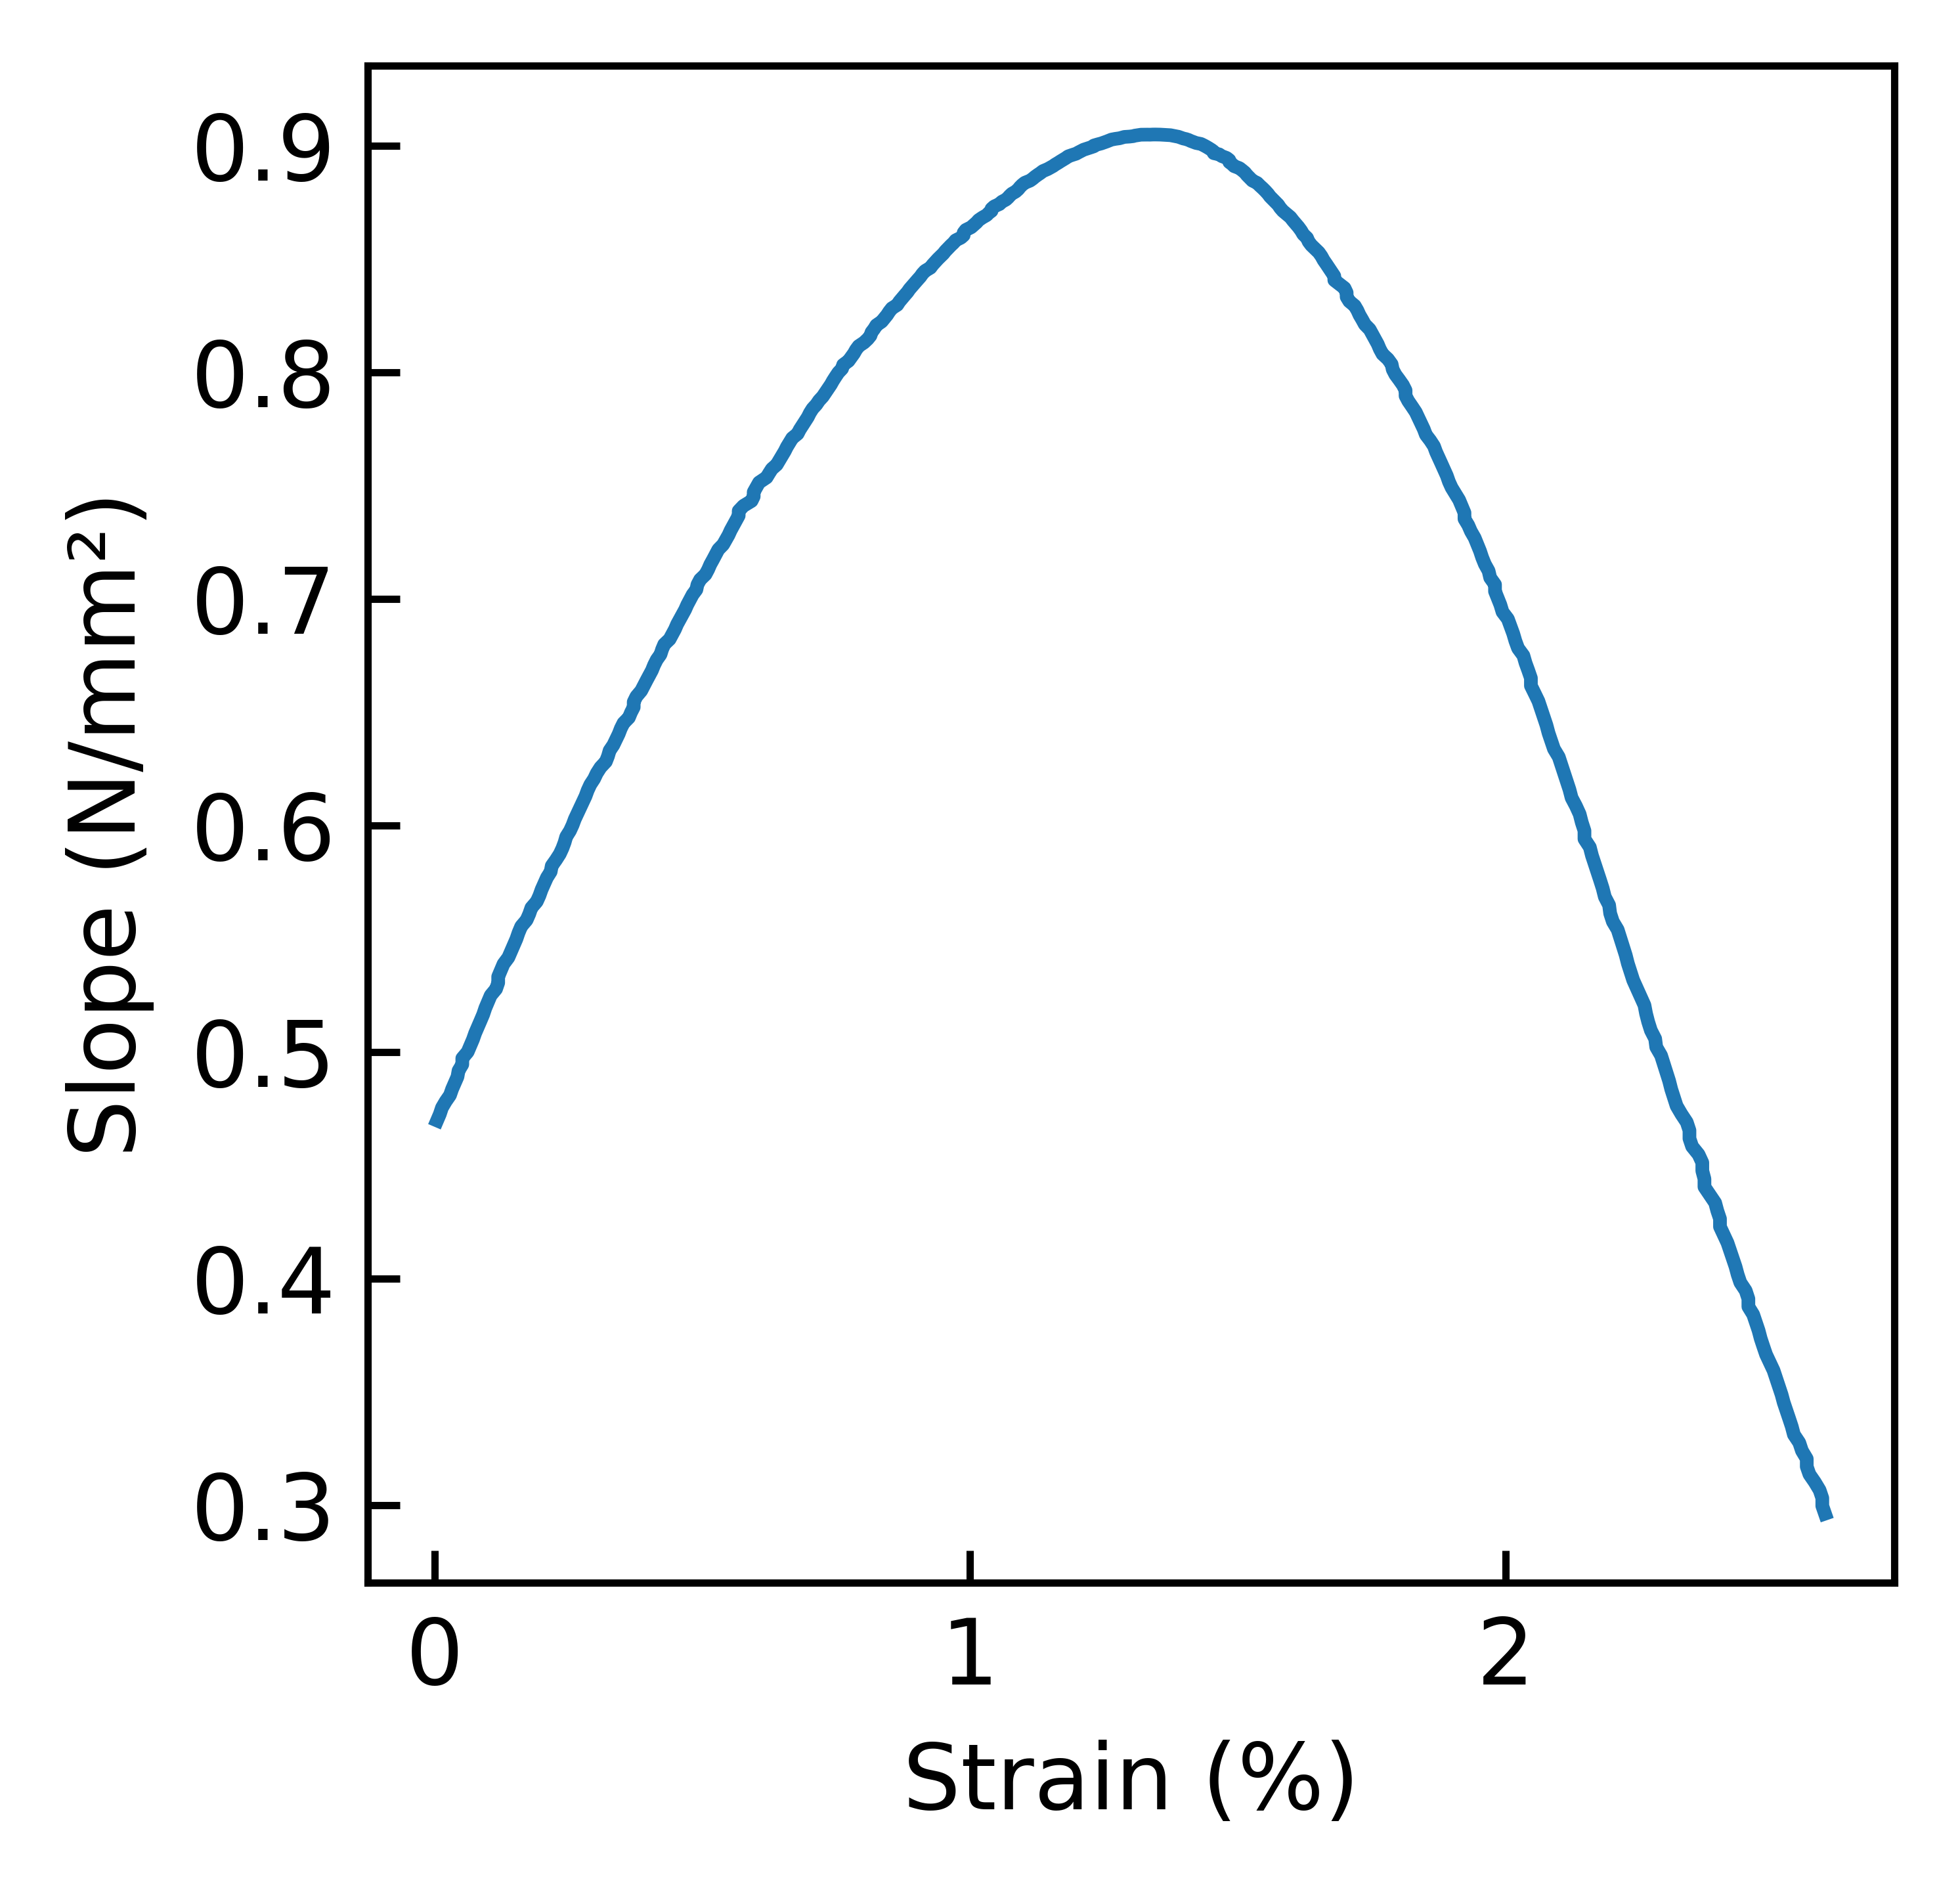

In [17]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(3, 3), dpi=1000)
plt.xlabel("Strain (%)")
plt.ylabel("Slope (N/mm\u00b2)")
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

plt.plot(strain[:top_index - area], slope)

plt.show()

All Slope

Warning : need long time, may 12 ~ 20 min

In [30]:
def find_data(path : str, target_extension='.xlsx') -> list:

    data = []

    florders = os.listdir(path)

    for florder in florders:

        florder_path = os.path.join(path, florder)

        if not os.path.isdir(florder_path):
            continue

        files = [f for f in os.listdir(florder_path) if f.endswith(target_extension)]

        for file in files:
            file_path = os.path.join(florder_path, file)
            d = [i[4:] for i in pd.read_excel(file_path).values if i[5] != 0]
            data.append(np.array(d))
    
    return data

def slope_caculetor(arr : np.ndarray, jump=1) -> np.ndarray:

    slope = [[], []]
    data = [arr[:, 1], arr[:, 0]]
    top_index = np.argmax(data[1])+1

    for area in range(1, 400, jump):
        test_range = [(i, i+area) for i in range(top_index-area)]
        current_slope = [np.polyfit(data[0][i:j], data[1][i:j], 1)[0] for i,j in test_range]
        slope[0].append(area)
        slope[1].append(max(current_slope))
        
    return slope

data = find_data('/home/corn/Documents/ScienceFair/Data/Data_1')

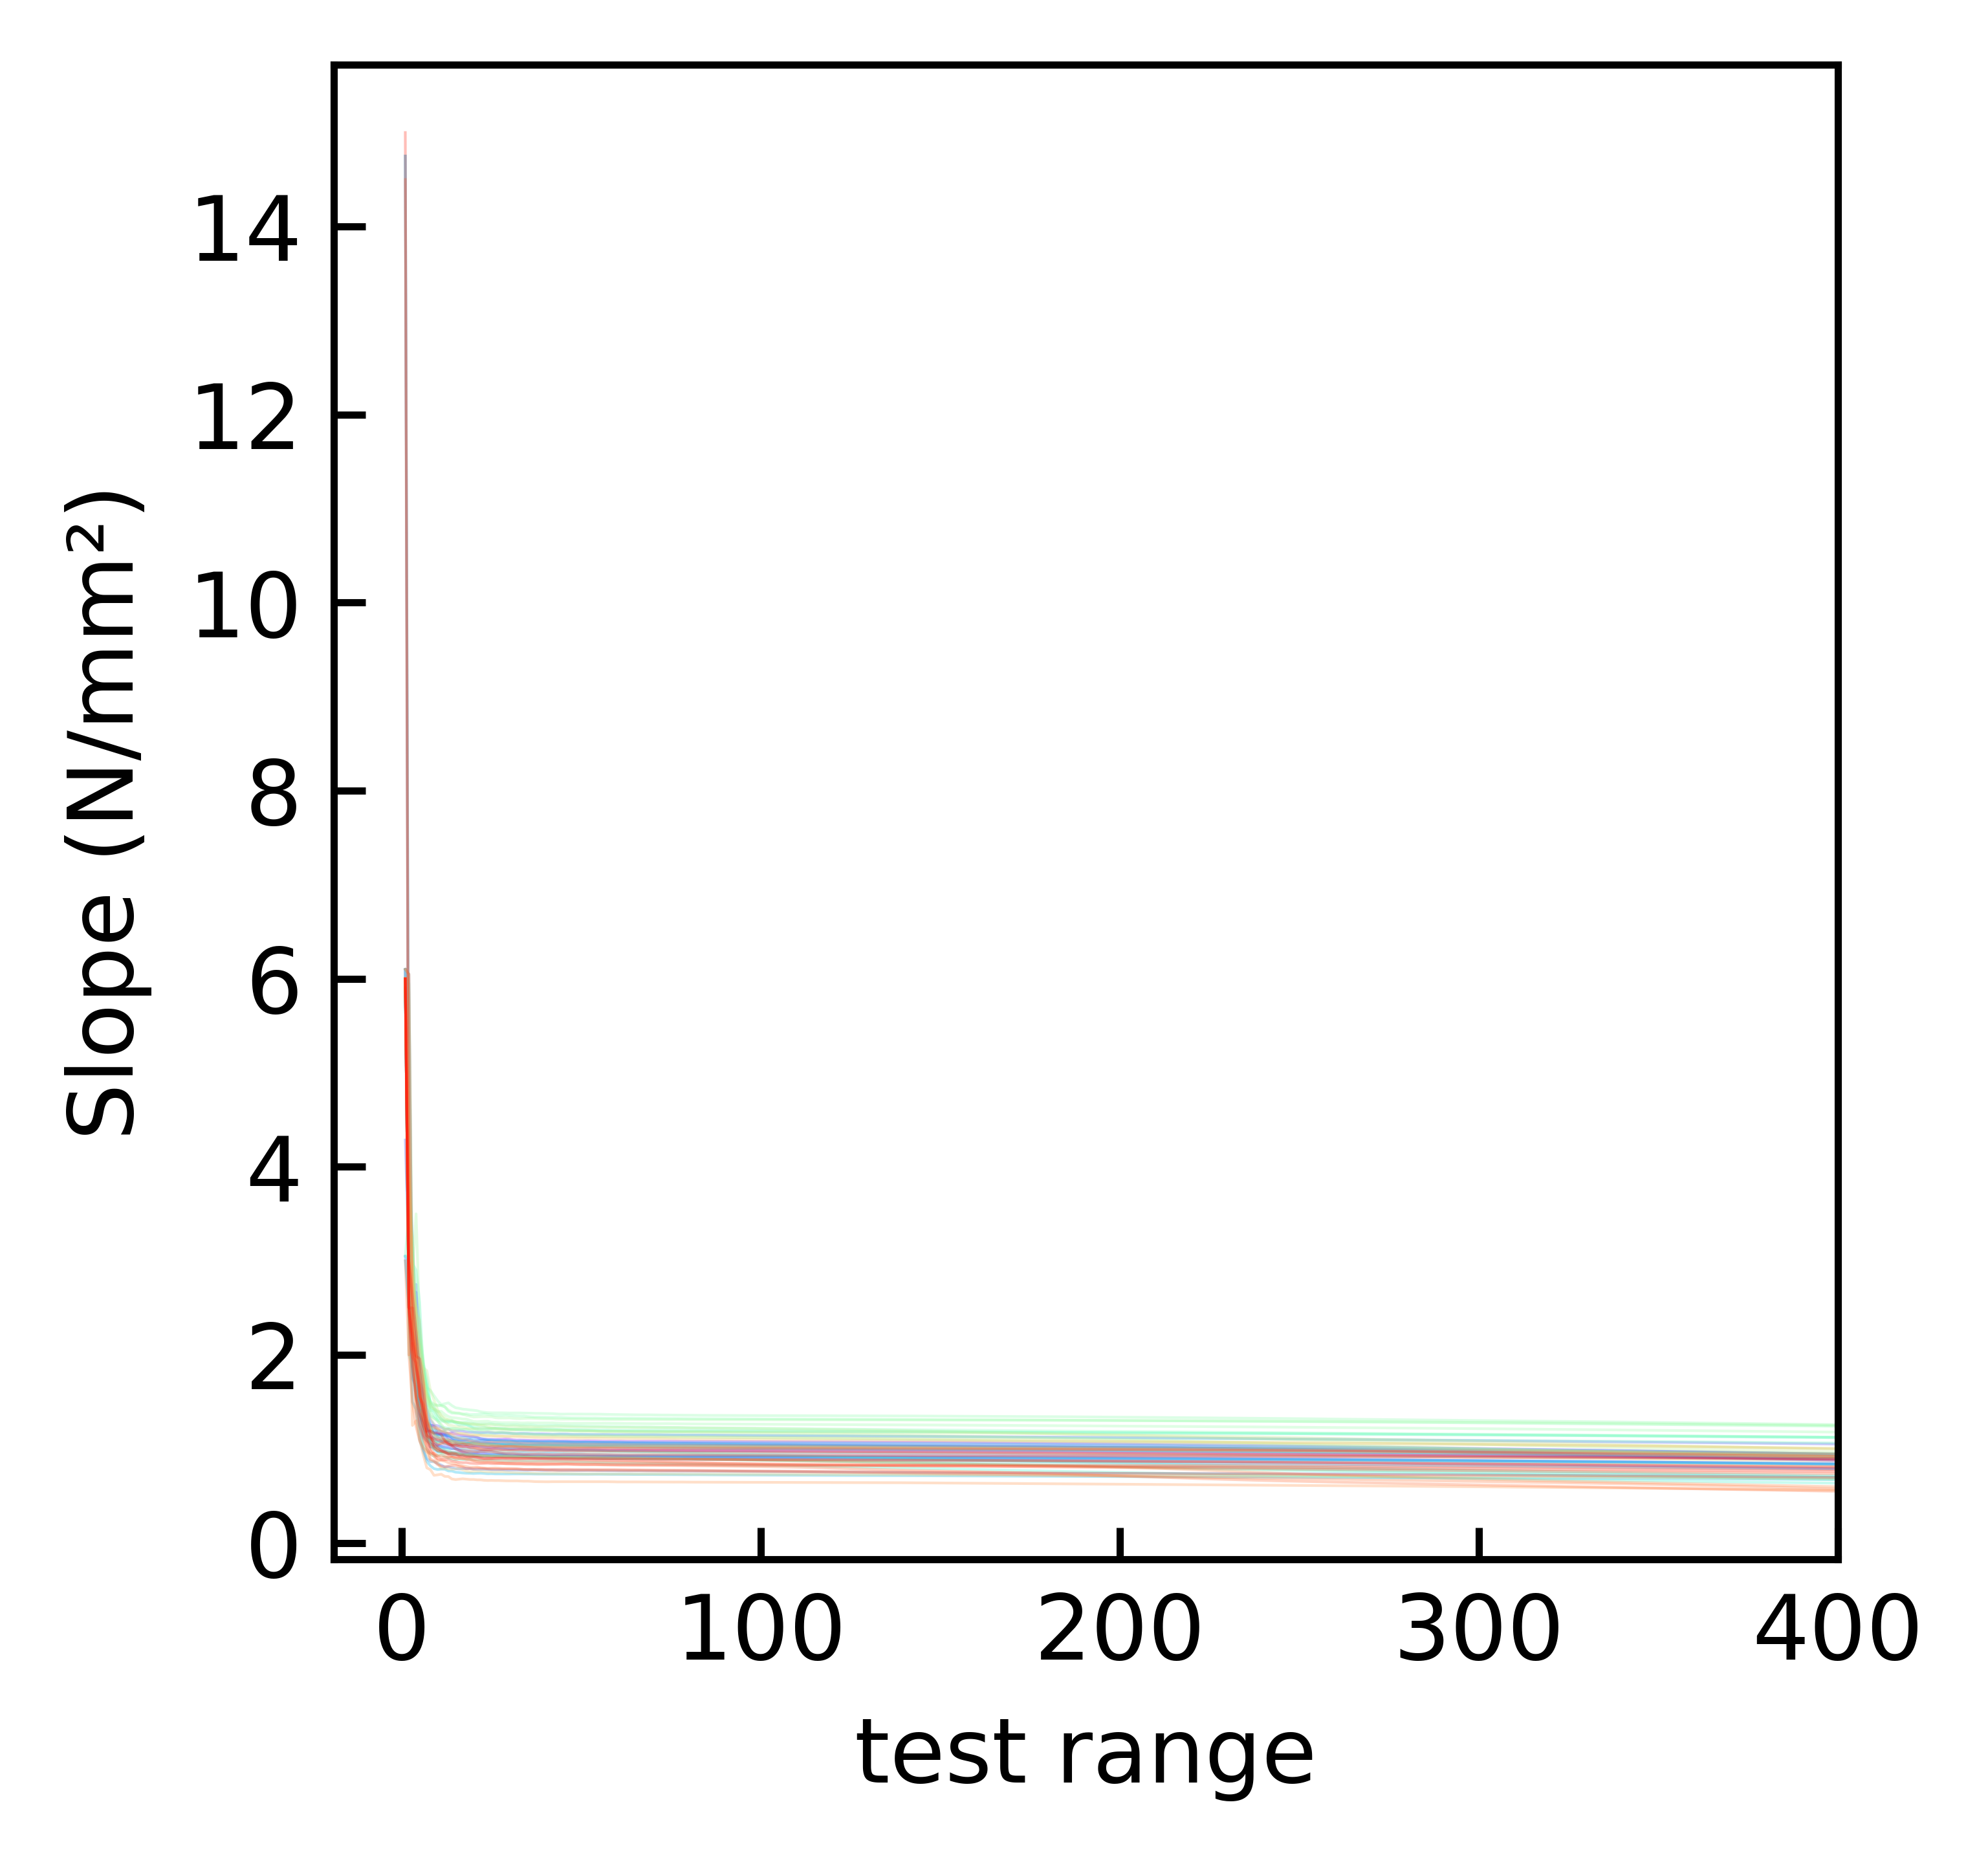

In [31]:
plt.rcParams.update({'font.size': 10})
colors = plt.cm.rainbow(np.linspace(0, 1, len(data)))

plt.figure(figsize=(3, 3), dpi=1000)

results = map(slope_caculetor, data)

for row,box in enumerate(results):
    plt.plot(box[0], box[1], color=colors[row], alpha = 0.3, linewidth=0.3)

plt.xlim(right=400)
plt.ylabel("Slope (N/mm\u00b2)")
plt.xlabel("test range")
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

plt.show()